In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import numpy as np 
import pandas as pd
from joblib import dump

In [ ]:
scaler = MinMaxScaler()

In [58]:
df = pd.read_csv('heart_data.csv')
pd.set_option('display.max_columns', 30)

In [53]:
df.head(2)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1


In [20]:
print("Null Values in our Dataset:", df.isnull().sum().sum())

Null Values in our Dataset: 0


In [75]:
columns_to_scale = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [77]:
df.head(2)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,0.325581,1,0,0,0,0,1,0,1,0,1.0,0.6,0.5,1,0,0.666667,0.6,0.285714
1,0,0,0,0,0.151163,1,0,0,1,0,0,0,0,1,0.5,0.0,0.0,0,0,0.500000,1.0,0.000000


### Spliting dataset

In [83]:
df.shape

(253680, 22)

In [91]:
y = df[['HeartDiseaseorAttack']]
x = df.drop(['HeartDiseaseorAttack'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values.ravel(), test_size=0.2, random_state=0)

### LogisticRegression

In [92]:
log_model = LogisticRegression()

In [93]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [98]:
print('Model Score: ', log_model.score(x_test, y_test))

Model Score:  0.909551403342794


In [109]:
pred = log_model.predict(x_test)

In [106]:
print('Confusion Matrix: \n\n', confusion_matrix(y_test, pred))

Confusion Matrix: 

 [[45457   507]
 [ 4082   690]]


In [108]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     45964
           1       0.58      0.14      0.23      4772

    accuracy                           0.91     50736
   macro avg       0.75      0.57      0.59     50736
weighted avg       0.89      0.91      0.88     50736



### Decision tree

In [111]:
model = DecisionTreeClassifier()

In [112]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [118]:
print('Model Score: ', model.score(x_test, y_test))

Model Score:  0.850067013560391


In [114]:
pred = model.predict(x_test)

In [115]:
confusion_matrix(y_test, pred)

array([[41799,  4165],
       [ 3442,  1330]], dtype=int64)

In [119]:
print('Confusion Matrix: \n\n', confusion_matrix(y_test, pred))

Confusion Matrix: 

 [[41799  4165]
 [ 3442  1330]]


In [130]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)

Text(0, 0.5, 'True Positve Rate')

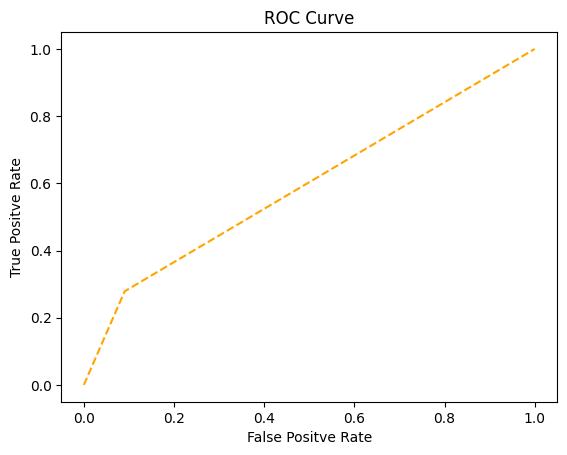

In [150]:
sns.lineplot(x=fpr1, y=tpr1, color='orange', linestyle='--')
plt.title("ROC Curve")
plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')

### Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()

In [152]:
forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [153]:
forest_model.score(x_test, y_test)

0.9029091769157994

In [154]:
pred = forest_model.predict(x_test)

In [157]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred)

Text(0, 0.5, 'True Positve Rate')

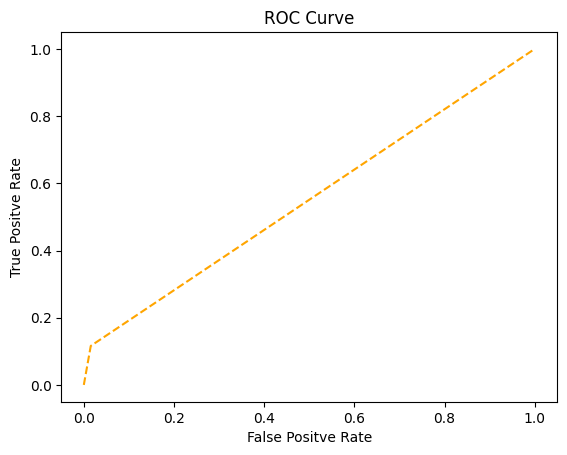

In [163]:
sns.lineplot(x=fpr1, y=tpr1, color='orange', linestyle='--')
plt.title("ROC Curve")
plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')

### Selected Model

* As understanding feature importance and their impact is crucial, Random Forest could be more suitable.
* Random Forest is more robust due to its ability to capture complex relationships.

### Exporting Model

In [164]:
import joblib

In [165]:
joblib.dump(forest_model, 'RandomForest_Model.joblib')

['RandomForest_Model.joblib']

In [166]:
model = joblib.load('RandomForest_Model.joblib')

In [170]:
model.predict([[0.0,0.0,1.0,0.38372093023255816,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1,0.0,0.0,0.25,0.8,0.0]])

array([0], dtype=int64)